# 以下准备covid19的pkl格式数据集

In [1]:
import numpy as np
import torch
import pickle
import time
import os
%matplotlib inline
import matplotlib.pyplot as plt

# 将数据转化为DGL格式

In [2]:
import os
os.chdir('../../') # go to root folder of the project
print(os.getcwd())

/data/benchmarking-gnns


In [3]:
import pickle

%load_ext autoreload
%autoreload 2

from data.superpixels import SuperPixDatasetDGL 

from data.data import LoadData
from torch.utils.data import DataLoader
from data.superpixels import SuperPixDataset

In [4]:
start = time.time()

DATASET_NAME = 'covid19'
dataset = SuperPixDatasetDGL(DATASET_NAME) 

print('Time (sec):',time.time() - start) # 356s=6min

Adj matrix defined from super-pixel locations (only)
preparing 690 graphs for the TEST set...
preparing 6424 graphs for the TRAIN set...
[I] Data load time: 313.8631s
Time (sec): 313.865047454834


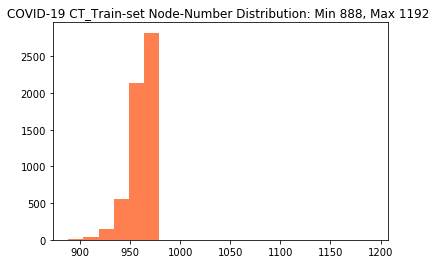

nb/min/max : 5734 888 1192


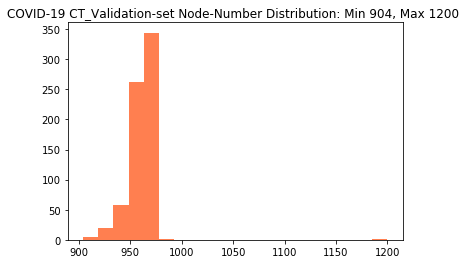

nb/min/max : 690 904 1200


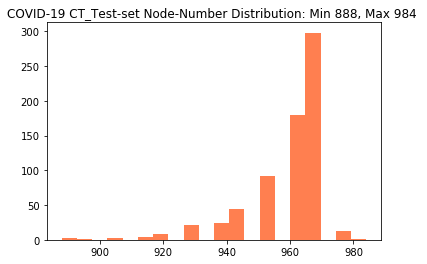

nb/min/max : 690 888 984


In [9]:
def plot_histo_graphs(dataset, title):
    # histogram of graph sizes
    graph_sizes = []
    for graph in dataset:
#         graph_sizes.append(graph[0].number_of_nodes())
        graph_sizes.append(graph[0].number_of_edges())
    plt.figure(1)
    plt.hist(graph_sizes, bins=20, color='coral')
    plt.title(title)
    plt.show()
    graph_sizes = torch.Tensor(graph_sizes)
    print('nb/min/max :',len(graph_sizes),graph_sizes.min().long().item(),graph_sizes.max().long().item())
    
plot_histo_graphs(dataset.train,'COVID-19 CT_Train-set Node-Number Distribution: Min %s, Max %s ' %(888,1192))
plot_histo_graphs(dataset.val,'COVID-19 CT_Validation-set Node-Number Distribution: Min %s, Max %s ' %(904,1200))
plot_histo_graphs(dataset.test,'COVID-19 CT_Test-set Node-Number Distribution: Min %s, Max %s ' %(888,984))

In [6]:
print(len(dataset.train))
print(len(dataset.val))
print(len(dataset.test))

print(dataset.train[0])
print(dataset.val[0])
print(dataset.test[0])

5734
690
690
(DGLGraph(num_nodes=121, num_edges=968,
         ndata_schemes={'feat': Scheme(shape=(3,), dtype=torch.float16)}
         edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float16)}), tensor(1))
(DGLGraph(num_nodes=122, num_edges=976,
         ndata_schemes={'feat': Scheme(shape=(3,), dtype=torch.float16)}
         edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float16)}), tensor(0))
(DGLGraph(num_nodes=121, num_edges=968,
         ndata_schemes={'feat': Scheme(shape=(3,), dtype=torch.float16)}
         edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float16)}), tensor(1))


In [7]:
start = time.time()

with open('data/superpixels/covid19.pkl','wb') as f:
        pickle.dump([dataset.train,dataset.val,dataset.test],f)
        
print('Time (sec):',time.time() - start) # 38s

Time (sec): 4.121351718902588


# 检测Load function

In [8]:
DATASET_NAME = 'covid19'
dataset = LoadData(DATASET_NAME) # 54s
trainset, valset, testset = dataset.train, dataset.val, dataset.test

[I] Loading dataset covid19...
train, test, val sizes : 5734 690 690
[I] Finished loading.
[I] Data load time: 4.6900s


In [9]:
start = time.time()

batch_size = 10
collate = SuperPixDataset.collate
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, collate_fn=collate)

print('Time (sec):',time.time() - start) # 0.0003s


Time (sec): 0.0002562999725341797
